## 3.4 Classifying movie reviews

In [1]:
from keras import layers
from keras.datasets import imdb

Using TensorFlow backend.


In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


In [3]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [4]:
decode_review = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

In [5]:
print(decode_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [6]:
import numpy as np

In [7]:
def vectorize_sequences(seq, dimension=10000):
    results = np.zeros((len(seq), dimension))
    for i, s in enumerate(seq):
        results[i, s] = 1.
    return results


In [8]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [9]:
from keras import models
from keras import metrics
from keras import optimizers
from keras import losses

model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
#
# model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer=optimizers.RMSprop(lr=0.0001),
             loss=losses.MSE,
             metrics=[metrics.binary_crossentropy, metrics.binary_accuracy])

In [10]:
x_val = x_train[:10000]
y_val = y_train[:10000]

partial_x_train = x_train[10000:]
partial_y_train = y_train[10000:]

In [11]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 141us/step - loss: 0.2487 - binary_crossentropy: 0.6906 - binary_accuracy: 0.5403 - val_loss: 0.2447 - val_binary_crossentropy: 0.6825 - val_binary_accuracy: 0.6108
Epoch 2/20
15000/15000 [==============================] - 2s 124us/step - loss: 0.2375 - binary_crossentropy: 0.6680 - binary_accuracy: 0.6694 - val_loss: 0.2305 - val_binary_crossentropy: 0.6539 - val_binary_accuracy: 0.7157
Epoch 3/20
15000/15000 [==============================] - 2s 115us/step - loss: 0.2214 - binary_crossentropy: 0.6353 - binary_accuracy: 0.7534 - val_loss: 0.2165 - val_binary_crossentropy: 0.6252 - val_binary_accuracy: 0.7720
Epoch 4/20
15000/15000 [==============================] - 2s 121us/step - loss: 0.2070 - binary_crossentropy: 0.6055 - binary_accuracy: 0.8028 - val_loss: 0.2041 - val_binary_crossentropy: 0.5994 - val_binary_accuracy: 0.7994
Epoch 5/20
15000/15000 [======================

In [12]:
print(history.history.keys())

dict_keys(['val_loss', 'binary_crossentropy', 'loss', 'val_binary_crossentropy', 'val_binary_accuracy', 'binary_accuracy'])


In [13]:
results = model.evaluate(x_test, y_test)
print(results)
print(model.predict(x_test))

25000/25000 [==============================] - 2s 77us/step
[0.11651496637344361, 0.3884340719223022, 0.87272]
[[0.45627287]
 [0.95468956]
 [0.76986164]
 ...
 [0.3085714 ]
 [0.39003277]
 [0.5506192 ]]


In [14]:
import matplotlib.pyplot as plt

loss = history.history['loss']
loss_val = history.history['val_loss']
acc = history.history['binary_accuracy']
acc_val = history.history['val_binary_accuracy']
epochs = range(1, len(loss)+1)

plt.subplot(211)
plt.plot(epochs, acc, 'ro', label='training acc')
plt.plot(epochs, acc_val, 'r', label='validating acc')
plt.ylabel('acc')
plt.legend()
plt.subplot(212)
plt.plot(epochs, loss, 'bo', label='traing loss')
plt.plot(epochs, loss_val, 'b', label='validating loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

<Figure size 640x480 with 2 Axes>

## 3.5 Classifying newswires: A multi-class classification example

In [15]:
# loading the reuters dataset
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
print(len(train_data),len(test_data))

8982 2246


[1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]
4


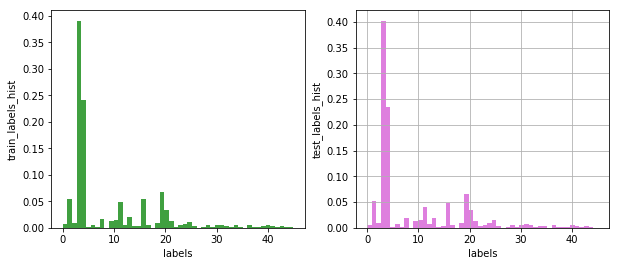

In [16]:
# look at the data
print(train_data[1])
print(train_labels[1])
plt.figure(figsize=(10,4))
plt.subplot(121)
n, bins, patches = plt.hist(train_labels, 50, density=True, facecolor='g', alpha=0.75)
plt.ylabel('train_labels_hist')
plt.xlabel('labels')
plt.subplot(122)
plt.hist(test_labels, 50, density=True, facecolor='m', alpha=0.5)
plt.ylabel('test_labels_hist')
plt.xlabel('labels')
plt.grid(True)
plt.show()

In [17]:
# prepross the data
def to_one_hot(labels, dim=46):
    results = np.zeros((len(labels),dim))
    for i, l in enumerate(labels):
        results[i,l] = 1.
    return results
    
x_train = vectorize_sequences(train_data)
y_train = to_one_hot(train_labels)

x_test = vectorize_sequences(test_data)
y_test = to_one_hot(test_labels)

In [18]:
# build the model
from keras import models, layers
from keras import metrics, optimizers, losses
model = models.Sequential()
classes = 46
Hidden_size=[128,64,64]
active_fun = 'relu'
for i, hs in enumerate(Hidden_size):
    if i is 0:
        model.add(layers.Dense(hs,activation=active_fun,input_shape=(10000,)))
    else:
        model.add(layers.Dense(hs,activation=active_fun))
model.add(layers.Dense(classes,activation='softmax'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.categorical_crossentropy,
             metrics=[metrics.categorical_accuracy])


In [19]:
# show the model
print(model.summary())
from keras.utils import plot_model
# plot_model(model,to_file='model1.png',show_shapes=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               1280128   
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 46)                2990      
Total params: 1,295,534
Trainable params: 1,295,534
Non-trainable params: 0
_________________________________________________________________
None


Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 219us/step - loss: 2.3910 - categorical_accuracy: 0.4997 - val_loss: 1.4644 - val_categorical_accuracy: 0.6650
Epoch 2/9
7982/7982 [==============================] - 1s 180us/step - loss: 1.2174 - categorical_accuracy: 0.7290 - val_loss: 1.1861 - val_categorical_accuracy: 0.7240
Epoch 3/9
7982/7982 [==============================] - 1s 182us/step - loss: 0.9015 - categorical_accuracy: 0.7972 - val_loss: 1.0386 - val_categorical_accuracy: 0.7660
Epoch 4/9
7982/7982 [==============================] - 1s 182us/step - loss: 0.6900 - categorical_accuracy: 0.8413 - val_loss: 0.9785 - val_categorical_accuracy: 0.7820
Epoch 5/9
7982/7982 [==============================] - 1s 183us/step - loss: 0.5169 - categorical_accuracy: 0.8845 - val_loss: 0.9390 - val_categorical_accuracy: 0.8000
Epoch 6/9
7982/7982 [==============================] - 1s 180us/step - loss: 0.4087 - categorical_accuracy:

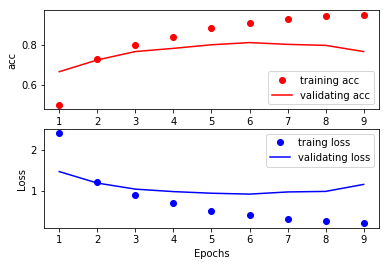

In [20]:
# validating the model
valid_size = 1000
epochs = 9
x_val = x_train[:valid_size]
y_val = y_train[:valid_size]
px_train = x_train[valid_size:]
py_train = y_train[valid_size:]

history = model.fit(px_train,
         py_train,
         epochs=epochs,
         batch_size=512,
         validation_data=(x_val, y_val))

import matplotlib.pyplot as plt

loss = history.history['loss']
loss_val = history.history['val_loss']
acc = history.history['categorical_accuracy']
acc_val = history.history['val_categorical_accuracy']
epochs = range(1, len(loss)+1)

plt.subplot(211)
plt.plot(epochs, acc, 'ro', label='training acc')
plt.plot(epochs, acc_val, 'r', label='validating acc')
plt.ylabel('acc')
plt.legend()
plt.subplot(212)
plt.plot(epochs, loss, 'bo', label='traing loss')
plt.plot(epochs, loss_val, 'b', label='validating loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [21]:
results = model.evaluate(x_test, y_test)
print(results)

2246/2246 [==============================] - 0s 183us/step
[1.262152463542704, 0.7466607302135373]


In [22]:
predictions = model.predict(x_test)

In [27]:
print(predictions[0].shape)
print(np.sum(predictions[0]))
print(np.argmax(predictions[0]))

(46,)
1.0
4


In [28]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 207us/step - loss: 0.1453 - acc: 0.9521 - val_loss: 1.0908 - val_acc: 0.7980
Epoch 2/9
7982/7982 [==============================] - 1s 180us/step - loss: 0.1026 - acc: 0.9572 - val_loss: 1.0874 - val_acc: 0.8050
Epoch 3/9
7982/7982 [==============================] - 1s 179us/step - loss: 0.1059 - acc: 0.9564 - val_loss: 1.1098 - val_acc: 0.7940
Epoch 4/9
7982/7982 [==============================] - 1s 180us/step - loss: 0.1017 - acc: 0.9587 - val_loss: 1.1564 - val_acc: 0.7920
Epoch 5/9
7982/7982 [==============================] - 2s 207us/step - loss: 0.0990 - acc: 0.9583 - val_loss: 1.1650 - val_acc: 0.7920
Epoch 6/9
7982/7982 [==============================] - 1s 185us/step - loss: 0.0972 - acc: 0.9590 - val_loss: 1.1225 - val_acc: 0.8010
Epoch 7/9
7982/7982 [==============================] - 1s 183us/step - loss: 0.0926 - acc: 0.9587 - val_loss: 1.1961 - val_acc: 0.7950
Epoch 8

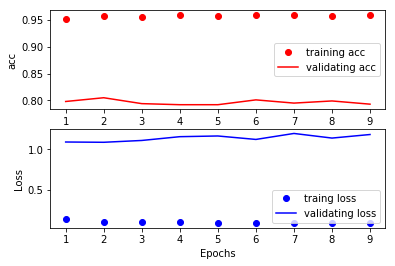

In [31]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

valid_size = 1000
epochs = 9
x_val = x_train[:valid_size]
y_val = y_train[:valid_size]
px_train = x_train[valid_size:]
py_train = y_train[valid_size:]
history = model.fit(px_train,
         py_train,
         epochs=epochs,
         batch_size=512,
         validation_data=(x_val, y_val))

import matplotlib.pyplot as plt

loss = history.history['loss']
loss_val = history.history['val_loss']
acc = history.history['acc']
acc_val = history.history['val_acc']
epochs = range(1, len(loss)+1)

plt.subplot(211)
plt.plot(epochs, acc, 'ro', label='training acc')
plt.plot(epochs, acc_val, 'r', label='validating acc')
plt.ylabel('acc')
plt.legend()
plt.subplot(212)
plt.plot(epochs, loss, 'bo', label='traing loss')
plt.plot(epochs, loss_val, 'b', label='validating loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [30]:
print(history.history.keys())

dict_keys(['val_loss', 'acc', 'val_acc', 'loss'])
